# Custom Histogram Bins Using the `breaks` Parameter

In [1]:
import pandas as pd

from lets_plot import *


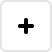
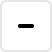
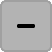
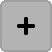
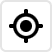
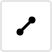
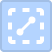
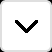
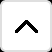
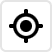
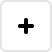
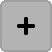
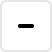
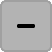
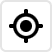
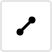
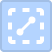
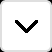
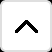
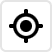

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/diamonds.csv")
print(df.shape)
df.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Default Bins

In [4]:
ggplot(df, aes("price")) + geom_histogram(color="black", fill="gray80")

## Equi-probable Bins

In [5]:
price_bins = df["price"].quantile(q=[i/10 for i in range(11)], interpolation="linear")
ggplot(df, aes("price")) + geom_histogram(breaks=price_bins, color="black", fill="gray80")

## Identity Stat

In [6]:
breaks = [2**d for d in range(16)]
bin_x = [(breaks[i] + breaks[i + 1]) / 2.0 for i in range(len(breaks) - 1)]             # bin centers
agg_df = df.assign(
    bin_x=pd.cut(df["price"], bins=breaks, labels=bin_x)                                # bin center, corresponding to current price
).groupby("bin_x", observed=True)["price"].count().to_frame("count").reset_index()      # aggregated dataframe: bin center -> size of bin
agg_df["bin_x"] = agg_df["bin_x"].astype(float)
agg_df

,bin_x,count
0,384.0,2004
1,768.0,13041
2,1536.0,9471
3,3072.0,10474
4,6144.0,11605
5,12288.0,6367
6,24576.0,978


In [7]:
ggplot(agg_df) + \
    geom_histogram(aes("bin_x", "count"), stat='identity', breaks=breaks, color="black", fill="gray80") + \
    xlab("price")